In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/evaluacionModelos/{name}.png', dpi=200, bbox_inches='tight')

In [3]:
redes_neuronales_df = pd.read_csv('../data/resultados/evaluacionModelos/rrnnConfig.csv', sep=';')
redes_neuronales_df.head()

,Layers,Neurons,Accuracy
0,4,"{25, 32, 42, 34}",0.933969
1,4,"{39, 34, 30, 36}",0.928954
2,4,"{37, 30, 27, 37}",0.934317
3,4,"{38, 41, 28, 33}",0.926999
4,4,"{23, 38, 39, 23}",0.928471


No handles with labels found to put in legend.


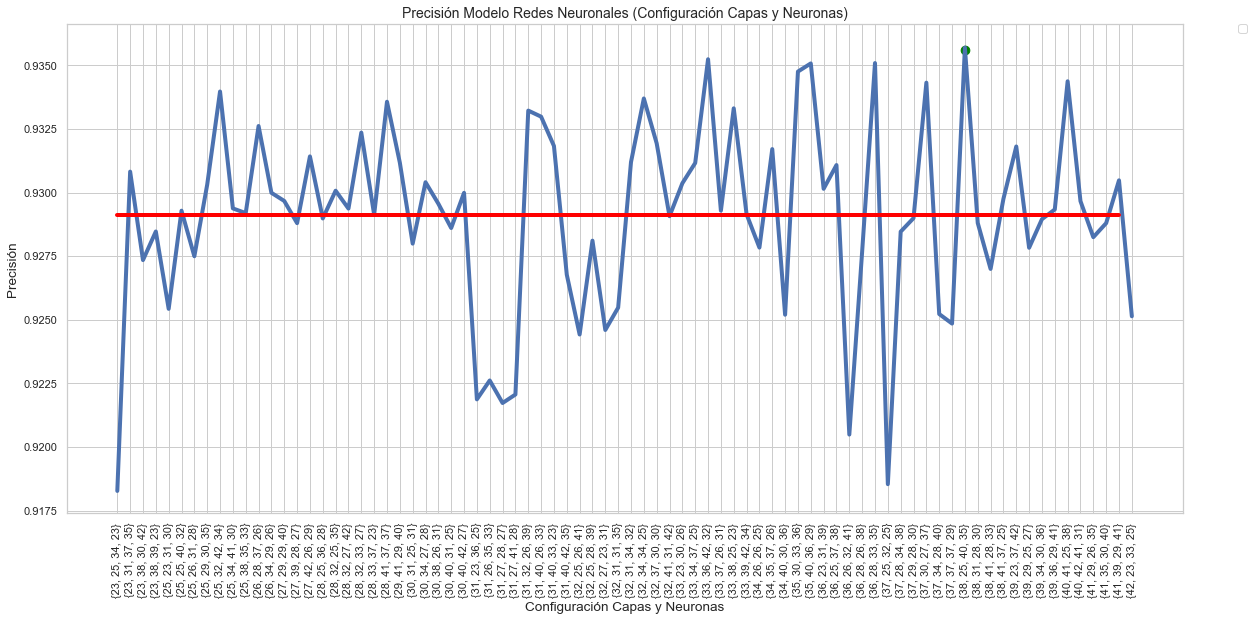

In [4]:
plt.figure(figsize=(20,9))
rrnn_graph = sns.lineplot(x="Neurons", y="Accuracy", data=redes_neuronales_df.sort_values(by=['Neurons']), markers='s')

plt.xticks(rotation=90)
plt.xlabel('Configuración Capas y Neuronas')
plt.ylabel('Precisión')


plt.plot([x for x in range(79)], [0.9291141450618333 for _ in range(79)], color='red')

plt.scatter(66, 0.935581, color='green', marker='.', s=300)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Precisión Modelo Redes Neuronales (Configuración Capas y Neuronas)", fontsize=14)

saveFigure(rrnn_graph, "neural_network-configuration")

In [5]:
configuracion = redes_neuronales_df[redes_neuronales_df['Layers'] == 4].sort_values(by=['Accuracy'], ascending=False).head(3)

configuracion

,Layers,Neurons,Accuracy
57,4,"{38, 25, 40, 35}",0.935693
67,4,"{33, 36, 42, 32}",0.935237
24,4,"{36, 28, 33, 35}",0.935087


## Configuración red elegida {38, 25, 40, 35} !!!!!!

### Elección Learning Rate y Tipo

In [6]:
learing_rate_df = pd.read_csv('../data/resultados/evaluacionModelos/rrnnLearningRate.csv', sep=';')
learing_rate_df = learing_rate_df[learing_rate_df['Tipo'] != 'INVSCALING']
learing_rate_df.head()

,LearningRate,Tipo,Accuracy
0,0.00001,CONSTANTE,0.889831
1,0.00001,ADAPTATIVO,0.889831
2,0.00010,CONSTANTE,0.914741
3,0.00010,ADAPTATIVO,0.914741
4,0.00100,CONSTANTE,0.932811


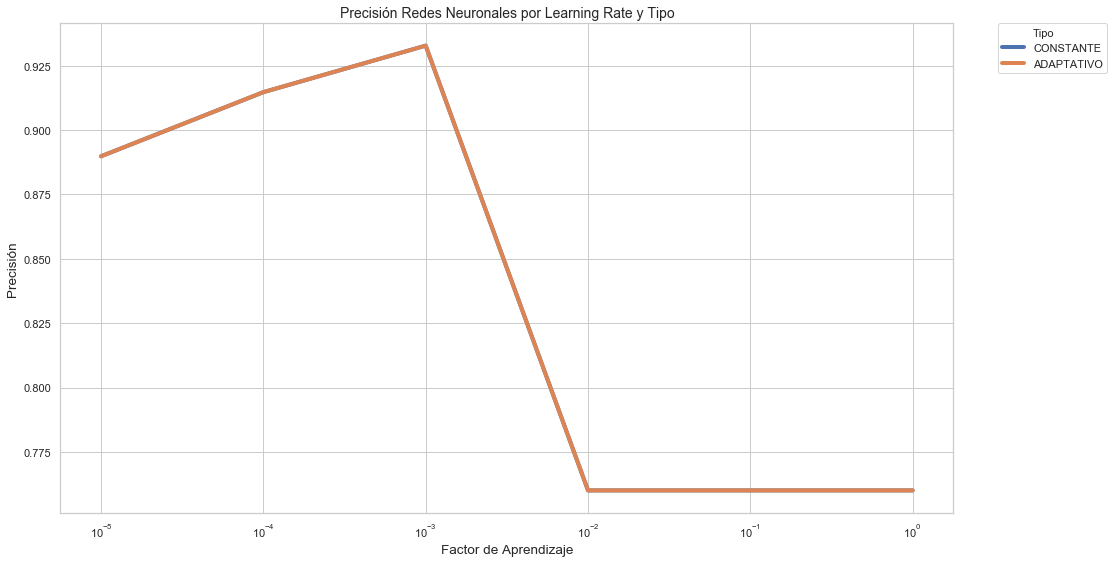

In [7]:
plt.figure(figsize=(16,9))
learning_rate_graph = sns.lineplot(x="LearningRate", y="Accuracy", hue='Tipo', data=learing_rate_df)


sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Precisión")
plt.xlabel("Factor de Aprendizaje")

plt.xscale('log')
plt.title("Precisión Redes Neuronales por Learning Rate y Tipo", fontsize=14)

saveFigure(learning_rate_graph, "neural_network-learning_rate-global")

In [8]:
learning_rate = learing_rate_df.sort_values(by=['Accuracy'], ascending=False).head(5)

learning_rate

,LearningRate,Tipo,Accuracy
4,0.00100,CONSTANTE,0.932811
5,0.00100,ADAPTATIVO,0.932811
2,0.00010,CONSTANTE,0.914741
3,0.00010,ADAPTATIVO,0.914741
0,0.00001,CONSTANTE,0.889831
